# 4. Analyze and Answering the question

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

At first of the time, we must load the cleaned data

In [4]:
clean_df = pd.read_csv('../clean_lichess_games.csv', encoding = 'utf-8')
clean_df

,Unnamed: 0,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_name,opening_ply,game_category,white level,black level,Rating_Diff,Quality,winner condition,base_time,increment_time
0,0,False,13,outoftime,white,1500,1191,D10,Slav Defense,5,rapid,Beginner,Beginner,309,Medium Quality,higher rating,15,2
1,1,True,16,resign,black,1322,1261,B00,Nimzowitsch Defense,4,blitz,Beginner,Beginner,61,High Quality,lower rating,5,10
2,2,True,61,mate,white,1496,1500,C20,King's Pawn Game,3,blitz,Beginner,Beginner,4,High Quality,higher rating,5,10
3,3,True,61,mate,white,1439,1454,D02,Queen's Pawn Game,3,rapid,Beginner,Beginner,15,High Quality,higher rating,20,0
4,4,True,95,mate,white,1523,1469,C41,Philidor Defense,5,rapid,Beginner,Beginner,54,High Quality,higher rating,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19108,20053,True,24,resign,white,1691,1220,A80,Dutch Defense,2,rapid,Intermediate,Beginner,471,Low Quality,higher rating,10,10
19109,20054,True,82,mate,black,1233,1196,A41,Queen's Pawn,2,rapid,Beginner,Beginner,37,High Quality,lower rating,10,0
19110,20055,True,35,mate,white,1219,1286,D00,Queen's Pawn Game,3,rapid,Beginner,Beginner,67,High Quality,higher rating,10,0
19111,20056,True,109,resign,white,1360,1227,B07,Pirc Defense,4,rapid,Beginner,Beginner,133,High Quality,higher rating,10,0


## Question 1: What is the average number of moves in games that end in a draw compared to games with a decisive result?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>

Đầu tiên cần trích xuất dataFrame cho mỗi kết quả trận đấu

In [5]:

df_draw = clean_df[clean_df['winner'] == 'draw']
df_white = clean_df[clean_df['winner'] == 'white']
df_black = clean_df[clean_df['winner'] == 'black']




#### <span style='color:#2B9C15 '>📉 Phân tích để trả lời câu hỏi </span>

Bước 1:

1. Tiền xử lý dữ liệu:
- Tạo một DataFrame 'games_result' gồm:
    - Cột 'game_result' phân loại các kết quả của trò chơi: 'Draw', 'White Wins', 'Black Wins'.
    - Cột 'turns' lưu trữ số lượt đi của mỗi trận đấu.

2. Chia dữ liệu thành 3 nhóm dựa trên kết quả trận đấu:
- df_draw cho các trận hòa.
- df_white cho các trận thắng của người chơi trắng.
- df_black cho các trận thắng của người chơi đen.

3. Vẽ biểu đồ phân phối số lượt đi cho từng nhóm kết quả trận đấu.
- Sử dụng sns.histplot để vẽ các biểu đồ với đường cong KDE cho mỗi nhóm dữ liệu.
- Điều chỉnh các tham số của biểu đồ như màu sắc, tiêu đề, nhãn trục sao cho hình ảnh trực quan dễ hiểu và rõ ràng.


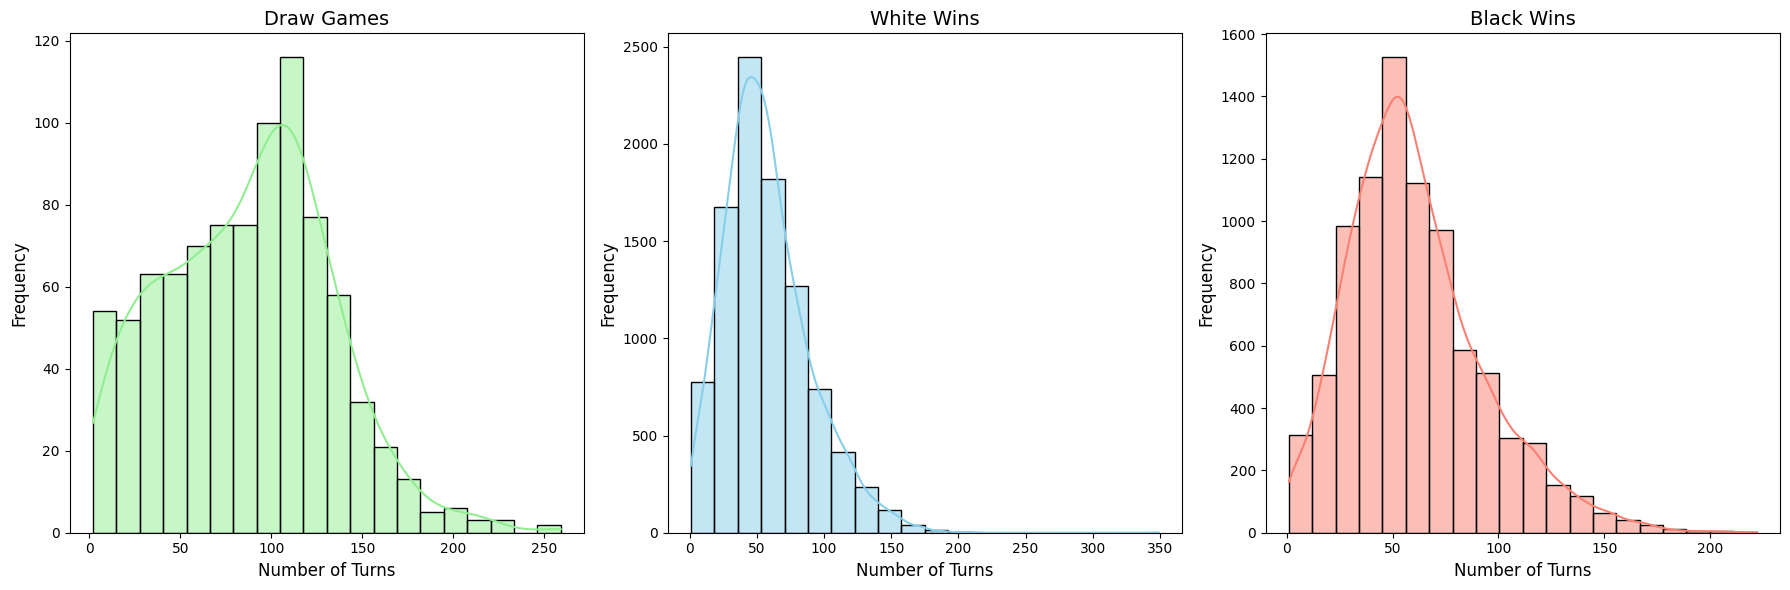

In [6]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data=df_draw, x='turns', kde=True, color='lightgreen', ax=axes[0], bins=20)
axes[0].set_title('Draw Games', fontsize=14)
axes[0].set_xlabel('Number of Turns', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=df_white, x='turns', kde=True, color='skyblue', ax=axes[1], bins=20)
axes[1].set_title('White Wins', fontsize=14)
axes[1].set_xlabel('Number of Turns', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=df_black, x='turns', kde=True, color='salmon', ax=axes[2], bins=20)
axes[2].set_title('Black Wins', fontsize=14)
axes[2].set_xlabel('Number of Turns', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

### Biểu đồ trận đấu hòa (Draw Games):
- **Phân bố lệch phải**: Phần lớn các trận đấu hòa có số lượt đi (turns) trong khoảng **100 đến 150 lượt**.
- **Tần suất cao**: Tần suất trận hòa tập trung quanh khoảng **120 lượt** với tần suất khoảng **100 trận**.
- **Trận đấu dài hơn**: Trận đấu hòa thường kéo dài hơn so với các trận đấu có kết quả thắng.

### Biểu đồ White Wins (White thắng):
- **Phân bố lệch phải rõ rệt**: Các trận đấu White thắng có số lượt chơi phổ biến nằm trong khoảng **40 đến 60 lượt**.
- **Tần suất cao nhất**: Số lượt chơi khoảng **50 lượt** có tần suất lớn nhất (**hơn 2500 trận**).
- **Phân bố hẹp hơn**: Các trận White thắng tập trung ở khoảng số lượt chơi nhỏ hơn so với Draw.

### Biểu đồ Black Wins (Black thắng):
- **Phân bố lệch phải tương tự**: Các trận đấu Black thắng có số lượt chơi phổ biến nằm trong khoảng **40 đến 70 lượt**.
- **Tần suất cao nhất**: Khoảng **60 lượt** có tần suất lớn nhất (**hơn 1400 trận**).
- **Giống với White Wins**: Biểu đồ của Black thắng khá tương đồng với White thắng nhưng tần suất đỉnh thấp hơn.

### So sánh tổng quan:
- **Draw Games**: Trận đấu hòa có xu hướng kéo dài hơn, số lượt chơi trung bình cao hơn, và phân bố dàn trải.
- **White Wins và Black Wins**: Trận đấu kết thúc với thắng lợi cho White hoặc Black thường ngắn hơn, tập trung vào khoảng **40-70 lượt**.
- **Tần suất cao nhất**: White thắng có tần suất cao nhất ở khoảng **50 lượt**, trong khi Black thắng cao nhất ở khoảng **60 lượt**.


## Question 2: Which openings are most commonly used, and how do they vary by player rating?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>


- Tạo danh sách level_order để xác định thứ tự các cấp độ từ cao đến thấp: "GrandMaster", "Expert", "Intermediate", "Advanced", "Rookie", "Beginner".

- Cột white level được chuyển thành kiểu dữ liệu Categorical, với các cấp độ được sắp xếp theo thứ tự đã định nghĩa trong level_order.

- Nhóm dữ liệu theo opening_name và white level để tính số lượng trận đấu (sử dụng .groupby() và .size()).

- Tính tổng số trận đấu cho mỗi mức độ kinh nghiệm (white level) và lưu vào cột Total_category_games.

- Tính tỷ lệ phần trăm của mỗi khai cuộc trong tổng số trận đấu của mỗi nhóm white level.

In [7]:
level_order = ["GrandMaster", "Expert", "Intermediate", "Advanced", "Rookie", "Beginner"]

clean_df['white level'] = pd.Categorical(clean_df['white level'], categories=level_order, ordered=True)

games_by_opening = clean_df.groupby(['opening_name', 'white level'], as_index=False).size()
games_by_opening.rename(columns={'size': 'Games'}, inplace=True)

games_by_opening['Total_category_games'] = games_by_opening.groupby('white level')['Games'].transform('sum')

games_by_opening['Percentage of total games'] = games_by_opening['Games'] / games_by_opening['Total_category_games']

sorted_games = (
    games_by_opening.sort_values(['white level', 'Games'], ascending=[True, False])
    .groupby('white level', group_keys=False)
    .head(10)
)

sorted_games['opening_name'] = sorted_games['opening_name'].apply(lambda x: '\n'.join(x[i:i+45] for i in range(0, len(x), 45)))


C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\3187711376.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_by_opening = clean_df.groupby(['opening_name', 'white level'], as_index=False).size()
C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\3187711376.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_by_opening['Total_category_games'] = games_by_opening.groupby('white level')['Games'].transform('sum')
C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\3187711376.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass o

#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>


Sắp xếp các khai cuộc theo white level và số lượng trận đấu (Games) theo thứ tự giảm dần, sau đó chọn 10 khai cuộc phổ biến nhất cho mỗi mức độ kinh nghiệm của người chơi cờ trắng.

C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\4108379452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


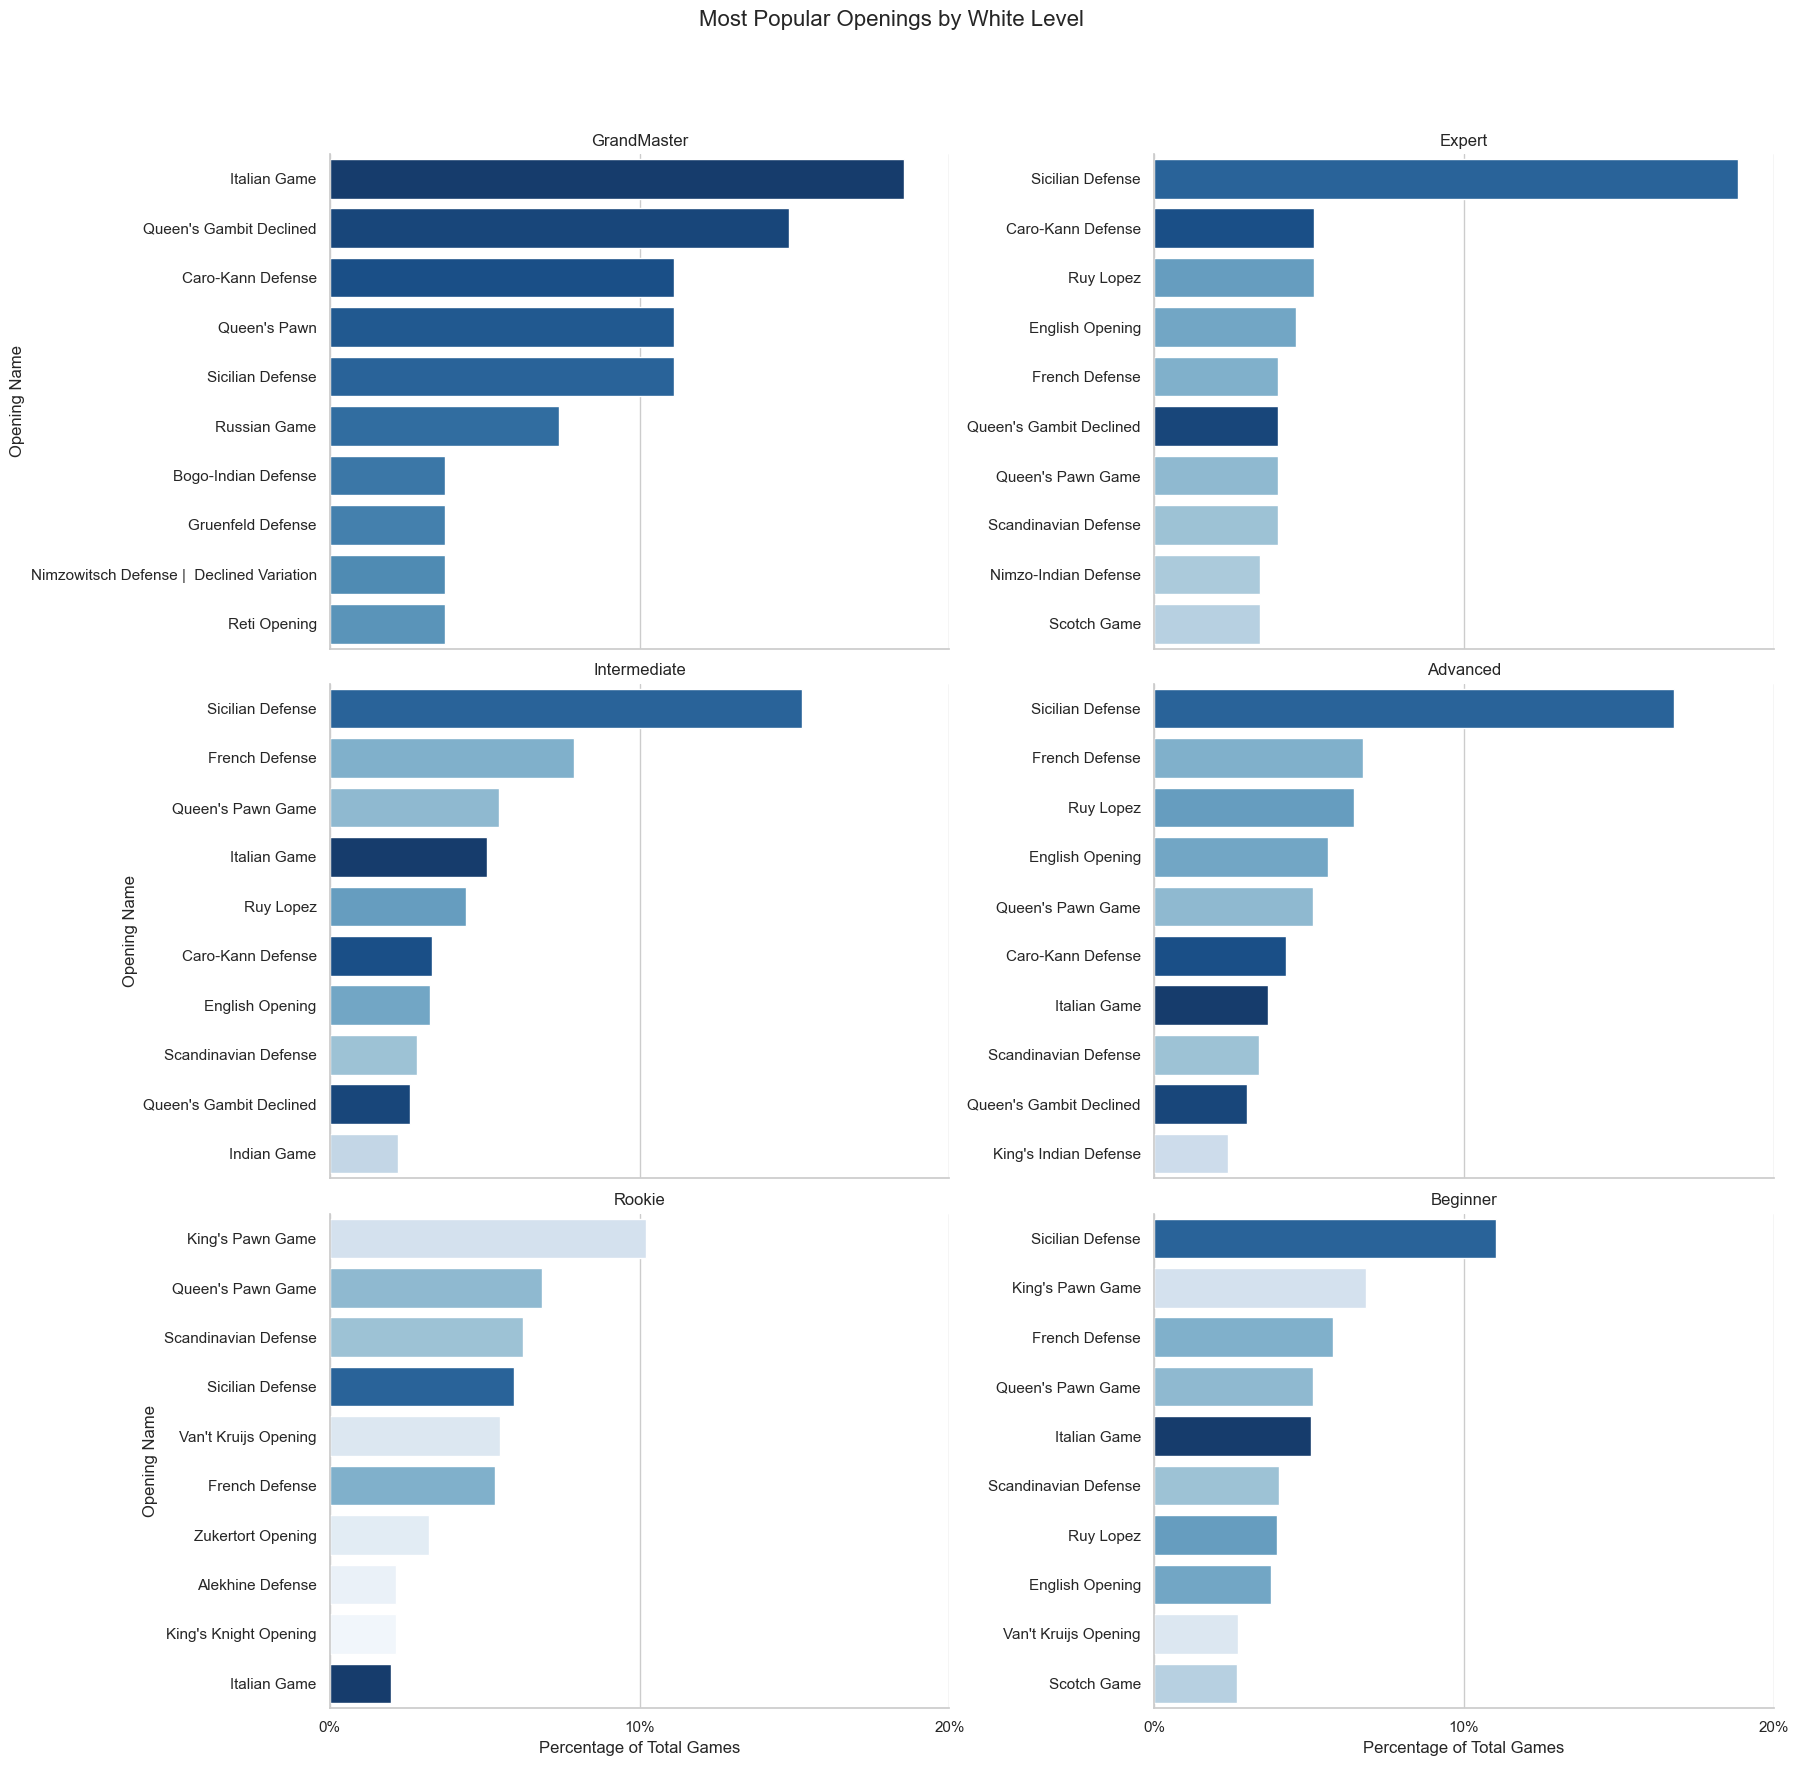

In [8]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=sorted_games,  
    x='Percentage of total games', 
    y='opening_name',  
    col='white level',  
    kind='bar', 
    palette='Blues_r', 
    height=6,  
    aspect=1.5,  
    col_wrap=2, 
    sharey=False  
)

g.set_titles("{col_name}")

g.set_axis_labels("Percentage of Total Games", "Opening Name")

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}")) 
    ax.set_xticks([i * 0.1 for i in range(0, 3)])  

    ax.set_xlim(0, 0.2)

plt.subplots_adjust(top=0.9)

g.fig.suptitle("Most Popular Openings by White Level", fontsize=16)

plt.show()

### **Nhận xét Tổng Quan**

- **Sicilian Defense**:  
  Phổ biến nhất ở mọi cấp độ, từ **Beginner** đến **GrandMaster**, cho thấy đây là khai cuộc mạnh và được ưa chuộng.  
  Lý do khiến khai cuộc này phổ biến ở mọi cấp độ là vì nó mang lại cơ hội thắng cao cho người cầm quân đen. Tuy nhiên, trong cờ vua, khi bạn nhận được lợi thế ở một mặt nào đó, bạn cũng phải chấp nhận rủi ro lớn hơn. Vì vậy, tỷ lệ thua cuộc khi sử dụng khai cuộc này cũng cao hơn.

- **Xu hướng khai cuộc với 1.e4**:  
  Một xu hướng rõ ràng từ dữ liệu của chúng ta là: **cấp độ càng cao, người chơi càng ít bắt đầu với nước 1.e4**.  
  - **1.e4** là nước đi được khuyến nghị cho người mới bắt đầu vì nó chiếm lĩnh trung tâm và mở đường cho cả quân hậu và quân tượng.  
  - Trong **Top 10 khai cuộc phổ biến** của người chơi cấp thấp, **8 khai cuộc bắt đầu với 1.e4** (ngoại lệ là **Queen’s Pawn Game** và **English Opening**).  
  - Ở cấp độ cao hơn, con số này giảm xuống còn **6** (thêm **Indian Game** và **Queen’s Gambit Declined** vào danh sách ngoại lệ).  
  - Ở cấp độ **GrandMaster**, con số này chỉ còn **5** (ngoại lệ mới bao gồm **Zukertort Opening** và **King’s Indian Defense**).

- **Cấp độ cao (GrandMaster, Expert)**:  
  Xu hướng sử dụng các khai cuộc phức tạp và chiến lược như **Italian Game**, **Caro-Kann Defense**, và **Queen's Gambit Declined**.

- **Cấp độ thấp (Rookie, Beginner)**:  
  Các khai cuộc đơn giản và cơ bản như **King's Pawn Game**, **Queen's Pawn Game**, và **Van't Kruijs Opening** được ưa chuộng.

---

### **Các khai cuộc không phổ biến ở cấp độ thấp**

Mặc dù các danh sách có nhiều điểm tương đồng, **khai cuộc phổ biến hơn ở các trận đấu cấp thấp**:


#### **King’s Pawn Game**

Như tên gọi, khai cuộc này liên quan đến việc di chuyển tốt Vua (tốt e2 cho quân trắng). Tuy nhiên, các trận đấu được xếp vào danh mục này là những trận có các nước đi khai cuộc **không phổ biến**.

Hầu hết các khai cuộc quen thuộc như **Sicilian Defense**, **Scandinavian Defense**, **Ruy Lopez**, và **Italian Game** cũng liên quan đến việc di chuyển tốt Vua, nhưng danh mục này chỉ bao gồm các nước đi tiếp theo **không thường gặp**.

Ví dụ về hai nước đi không phổ biến trong King’s Pawn Game:
- **Ví dụ 1**: 1.e4 e5 2.Qh5?!  
  Nước đi này khiến quân hậu dễ dàng bị tấn công bởi 2...Nc6 và tiếp theo là 3...Nf6. Nguyên tắc chung là nên phát triển các quân nhẹ trước khi đưa quân hậu vào cuộc chơi.

- **Ví dụ 2**: 1.e4 e5 2.d3?!  
  Nước đi này chặn đường phát triển của quân tượng trên f1 và quá bảo vệ ô e4, trong khi ô này không thực sự bị đe dọa. Trắng có thể làm tốt hơn bằng cách phát triển quân mã hoặc quân tượng.


### **Nhận xét**  
- Khi cấp độ tăng lên, các khai cuộc trở nên **phức tạp hơn** và được lựa chọn một cách chiến lược.  
- Ví dụ: **Sicilian Defense**, **Caro-Kann Defense**, và **Queen's Gambit Declined** thường xuất hiện ở các cấp độ cao.  
- Ngược lại, các khai cuộc đơn giản hơn như **King's Pawn Game** và **Philidor Defense** thường phổ biến ở cấp độ thấp do tính dễ học và ít lý thuyết.



## Question 3: Is there a significant difference in the performance of players across different openings when analyzed by rating groups?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>

In [9]:
top_openings = clean_df['opening_name'].value_counts().head(10).index
white_levels = clean_df['white level'].unique()

filtered_data = clean_df[clean_df['opening_name'].isin(top_openings)]


performance_by_level = (
    filtered_data.groupby(['white level', 'opening_name', 'winner'])
    .size()
    .unstack()
    .fillna(0)
    .astype('int')
)

performance_by_level['total_games'] = performance_by_level.sum(axis=1)
performance_by_level['white_win_rate'] = performance_by_level['white'] / performance_by_level['total_games']
performance_by_level['black_win_rate'] = performance_by_level['black'] / performance_by_level['total_games']
performance_by_level['draw_rate'] = performance_by_level['draw'] / performance_by_level['total_games']


C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\2259576214.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby(['white level', 'opening_name', 'winner'])


#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>

Ban đầu, chúng ta định nghĩa hiệu suất là **số trận thắng / tổng số trận**

**Bước 1**: Lấy 10 tên khai cuộc phổ biến nhất **opening_names**.

**Bước 2**: Nhóm dữ liệu theo cấp độ trắng và tên khai cuộc để tính toán hiệu suất.

**Bước 3**: Đảm bảo tất cả các cấp độ đều có cùng 10 tên khai cuộc bằng cách điền các tên thiếu bằng số 0.

**Bước 4**: Tính toán các chỉ số hiệu suất (tỷ lệ thắng, thua, hòa) cho mỗi khai cuộc trong mỗi cấp độ trắng.

**Bước 5**: Trực quan hóa hiệu suất cho mỗi cấp độ trắng bằng biểu đồ cột.

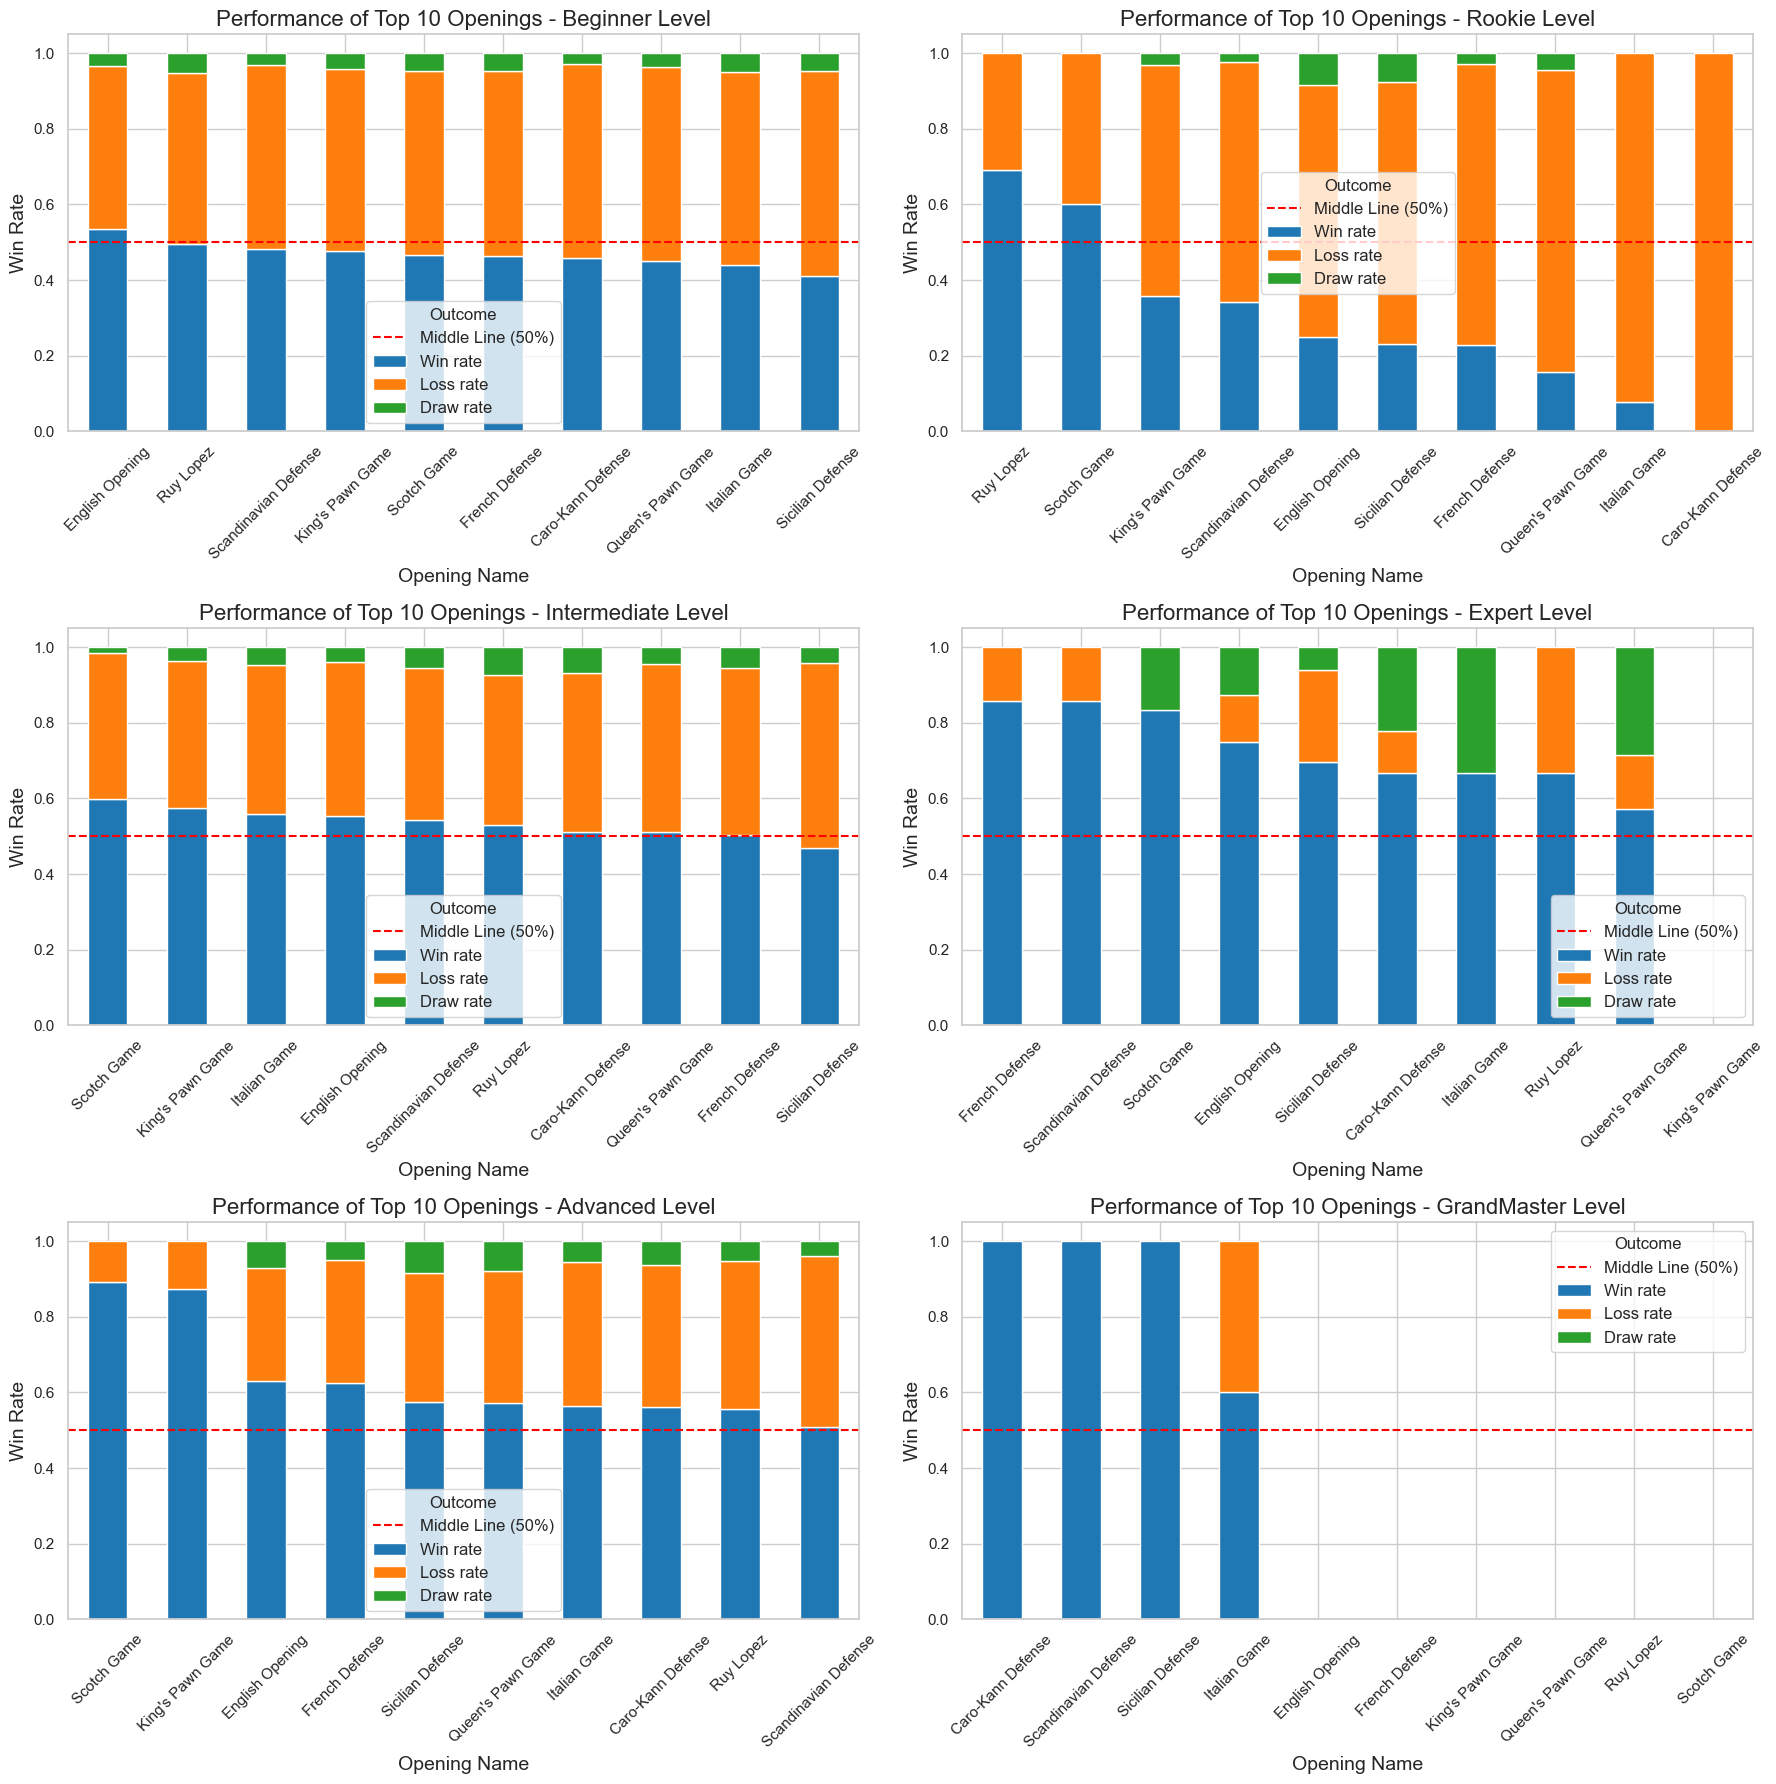

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(18, 6 * 3))

axes = axes.flatten()

for idx, level in enumerate(white_levels):
    level_data = performance_by_level.loc[level]
    
    level_data_sorted = level_data.sort_values('white_win_rate', ascending=False)
    
    level_data_sorted[['white_win_rate', 'black_win_rate', 'draw_rate']].plot(
        kind='bar', 
        stacked=True, 
        color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
        ax=axes[idx]
    )
    axes[idx].hlines(y=0.5, xmin=-0.5, xmax=len(level_data_sorted) - 0.5, colors='red', linestyles='dashed', label='Middle Line (50%)')
    
    axes[idx].set_title(f'Performance of Top 10 Openings - {level} Level', fontsize=16)
    axes[idx].set_xlabel('Opening Name', fontsize=14)
    axes[idx].set_ylabel('Win Rate', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(['Middle Line (50%)', 'Win rate', 'Loss rate', 'Draw rate'], title='Outcome', fontsize=12)

plt.tight_layout()
plt.show()

- **Nhìn chung**, người chơi ở các cấp độ **Beginner** và **Intermediate** thể hiện tỷ lệ thắng tương tự nhau trên các tên khai cuộc khác nhau, mặc dù sự biến động thấp:
  - **Cấp độ Beginner**: **English Opening** và **Ruy Lopez** có tỷ lệ thắng cao nhất, mỗi bên khoảng 50%, trong khi **Sicilian Defense** có tỷ lệ thắng thấp nhất, dưới 50%.
  - **Cấp độ Intermediate**: Tương tự, cấp độ này cũng thấy **Sicilian Defense** với tỷ lệ thắng thấp nhất, khoảng 50%. Ngược lại, **Scotch Game** và **King's Pawn Game** đạt những con số cao nhất, gần 60%.

- Người chơi ở các cấp độ **Rookie**, **Expert** và **Advanced** thể hiện sự biến động nhiều hơn trong tỷ lệ thắng so với các cấp độ Beginner và Intermediate:
  - **Cấp độ Rookie**: **Ruy Lopez** và **Scotch Game** có tỷ lệ thắng cao nhất, lần lượt là 70% và 60%. Trong khi đó, **Caro-Kann Defense** đứng ở vị trí thấp nhất với tỷ lệ thắng 0%.
  - **Cấp độ Expert**: **French Defense**, **Scandinavian Defense**, và **Scotch Game** sở hữu tỷ lệ thắng cao nhất, mỗi tên vượt trên 80%. Ngược lại, **Queen's Pawn Game** có tỷ lệ thấp nhất, khoảng 60%.
  - **Cấp độ Advanced**: **Scotch Game** và **King's Pawn Game** đứng đầu với tỷ lệ thắng gần 90%, trong khi **Scandinavian Defense** ghi nhận con số thấp nhất, tại 50%.

- Người chơi **Grandmaster** nổi bật với chỉ bốn tên khai cuộc phổ biến, với các con số khác biệt đáng kể so với các cấp độ khác. **Caro-Kann Defense**, **Scandinavian Defense**, và **Sicilian Defense** thống trị với tỷ lệ thắng hoàn hảo 100%, trong khi **Italian Game** đạt tỷ lệ thắng 60%.


#### **Rút ra nhận định**

*1. Khai cuộc ảnh hưởng đến tỷ lệ thắng nhiều hơn ở các cấp độ cao hơn*
- Đối với người chơi ở cấp độ **Beginner** và **Intermediate**, tỷ lệ thắng trên các khai cuộc khác nhau thể hiện sự biến động tối thiểu. Điều này cho thấy ở những cấp độ này, kết quả phụ thuộc nhiều hơn vào khả năng cờ vua tổng quát thay vì lựa chọn khai cuộc.
- Ngược lại, người chơi ở các cấp độ **Rookie**, **Expert** và **Advanced** cho thấy sự khác biệt rõ rệt trong tỷ lệ thắng qua các khai cuộc, nhấn mạnh tầm quan trọng ngày càng tăng của việc thành thạo các khai cuộc cụ thể khi người chơi tiến bộ.

*2. Khai cuộc phức tạp có thể cản trở sự phát triển ban đầu*
- Các khai cuộc như **Sicilian Defense** liên tục thể hiện hiệu suất kém hơn đối với người chơi ở cấp độ **Beginner** và **Intermediate**, gợi ý rằng các khai cuộc phức tạp có thể làm người chơi ít kinh nghiệm bị quá tải. Tránh những khai cuộc như vậy trong giai đoạn đầu có thể giúp người chơi tập trung vào các kỹ năng nền tảng.
- Tương tự, **Caro-Kann Defense** cho thấy tỷ lệ thắng 0% ở cấp độ **Rookie**, củng cố rằng một số khai cuộc phòng thủ có thể không phù hợp với khả năng của những người chơi đang phát triển.

*3. Một số khai cuộc luôn vượt trội*
- **Ruy Lopez** và **Scotch Game** là những khai cuộc nổi bật ở nhiều cấp độ, đặc biệt là đối với **Rookies** (tỷ lệ thắng 70% cho Ruy Lopez) và **Experts** (tỷ lệ thắng trên 80% cho Scotch Game). Những khai cuộc này có thể dễ học hơn và cung cấp các cơ hội chiến lược mạnh mẽ, làm cho chúng trở nên lý tưởng cho những người chơi đang chuyển tiếp giữa các cấp độ kỹ năng.

*4. Grandmasters yêu cầu sự hoàn hảo*
- Ở cấp độ **Grandmaster**, chỉ có bốn khai cuộc được sử dụng, trong đó ba khai cuộc (**Caro-Kann Defense**, **Scandinavian Defense**, và **Sicilian Defense**) đạt tỷ lệ thắng hoàn hảo 100%. Điều này chứng tỏ rằng những người chơi hàng đầu tập trung vào những khai cuộc đã được nghiên cứu kỹ lưỡng với thành công đã được chứng minh, ưu tiên sự chính xác hơn là đa dạng.
  Thành công của họ với **Sicilian Defense** cho thấy nó rất hiệu quả khi được sử dụng bởi các chuyên gia, mặc dù nó đầy thách thức đối với người mới bắt đầu.

*5. Làm sao để cải thiện cấp độ*
- Người chơi ở cấp độ **Beginner** và **Intermediate** nên tập trung vào những khai cuộc đơn giản, hiệu quả cao như **Ruy Lopez** và **King's Pawn Game** để xây dựng sự tự tin và kỹ năng nền tảng.
- Người chơi ở cấp độ **Advanced** có thể mở rộng kho kiến thức của mình để bao gồm các khai cuộc tinh vi hơn, như **French Defense** và **Scandinavian Defense**, những khai cuộc này cung cấp chiều sâu chiến lược nhưng đòi hỏi sự thành thạo.

*6. Vai trò của Đơn giản hoá và Độ thành thục*
- Các khai cuộc với kế hoạch chiến lược đơn giản, như **Scotch Game**, đạt được thành công nhất quán ở mọi cấp độ. Điều này nhấn mạnh giá trị của sự đơn giản và luyện tập lặp đi lặp lại trong việc đạt được kết quả tốt hơn, đặc biệt khi người chơi tiến bộ.

## Question 4: What are the best openings for Higher Rating and Lower Rating


#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>


1. Nhóm dữ liệu theo winner condition và opening_name, tính số lượng trận đấu.
2. Tính tổng số trận đấu cho mỗi khai cuộc và tỷ lệ phần trăm trận đấu cho từng khai cuộc.
3. Lọc các khai cuộc có tổng số trận đấu > 50.

In [22]:
res_by_opening = clean_df.groupby(['winner condition', 'opening_name'], as_index=False).size()
res_by_opening.rename(columns={'size': 'Games'}, inplace=True)

res_by_opening['Total_games'] = res_by_opening.groupby('opening_name')['Games'].transform('sum')

res_by_opening['Games percent'] = res_by_opening['Games'] / res_by_opening['Total_games']

res_by_opening = res_by_opening[res_by_opening['Total_games'] > 50]

best_for_white = res_by_opening[res_by_opening['winner condition'] == 'higher rating'].nlargest(10, 'Games percent')
best_for_black = res_by_opening[res_by_opening['winner condition'] == 'lower rating'].nlargest(10, 'Games percent')

#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>


1. Chọn Top 10 khai cuộc cho White và Black:

- Lọc các khai cuộc có tỷ lệ thắng cao nhất cho người chơi trắng (higher rating) và đen (lower rating) từ dữ liệu đã lọc.
2. Vẽ biểu đồ:

- Sử dụng hàm openings_plot để vẽ biểu đồ thanh cho các khai cuộc có tỷ lệ thắng cao nhất cho người chơi trắng và đen, phân biệt bằng màu sắc: Màu "grey" cho trắng thắng, "black" cho đen thắng.

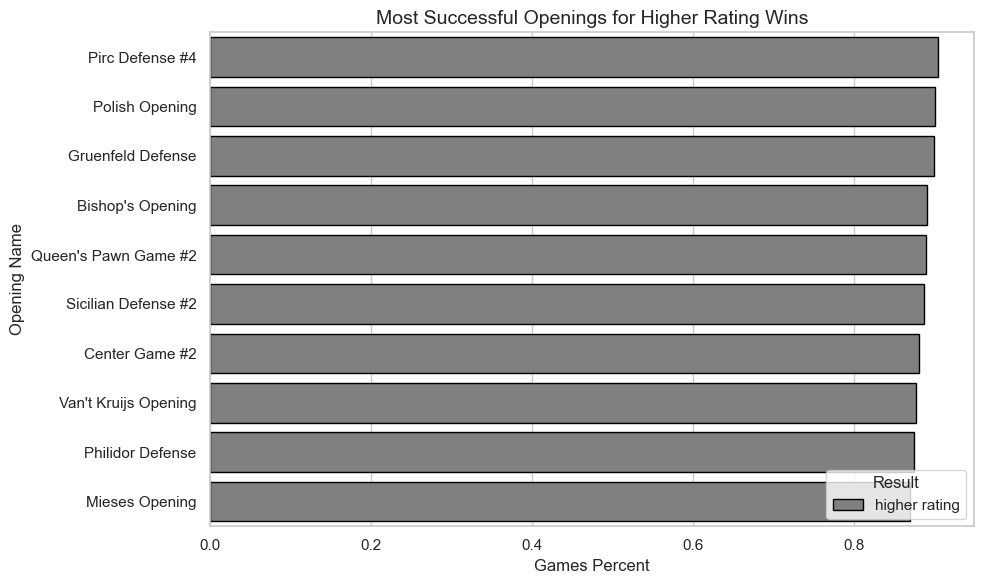

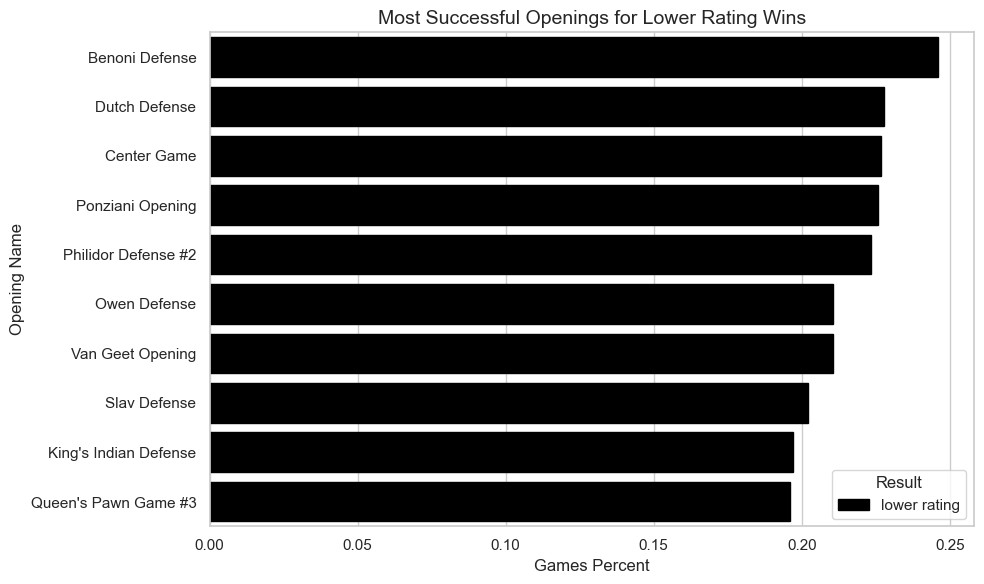

In [23]:
def openings_plot(dataset, title, color_map):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=dataset,
        x='Games percent',
        y='opening_name',
        hue='winner condition',
        dodge=False,
        palette=color_map,
        edgecolor="black"
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Games Percent")
    plt.ylabel("Opening Name")
    plt.legend(title="Result", loc="lower right")
    plt.tight_layout()
    plt.show()

color_map = {"higher rating": "grey", "lower rating": "black", "draw": "grey"}

openings_plot(best_for_white, "Most Successful Openings for Higher Rating Wins", color_map)

openings_plot(best_for_black, "Most Successful Openings for Lower Rating Wins", color_map)

## **Biểu đồ 1: Most Successful Openings for Higher Rating Wins**

### **Nhận xét:**
1. **Đặc điểm:**
   - Các khai cuộc như *Pirc Defense #4*, *Polish Opening*, và *Grunfeld Defense* có tỷ lệ thắng vượt trội (khoảng 80-90%).
   - Những khai cuộc này dựa trên việc kiểm soát trung tâm, triển khai quân hiệu quả và phản công khi đối thủ mắc sai lầm.
   - Phù hợp với người chơi có kiến thức sâu và kỹ năng chiến thuật tốt.

2. **Ý nghĩa:**
   - Người chơi Higher Rating thường chọn các khai cuộc quen thuộc và ít rủi ro để giảm thiểu sai lầm.
   - Áp lực phải thắng buộc họ sử dụng những khai cuộc mà họ tự tin nhất.

---

## **Biểu đồ 2: Most Successful Openings for Lower Rating Wins**

### **Nhận xét:**
1. **Đặc điểm:**
   - Các khai cuộc như *Benoni Defense*, *Dutch Defense*, và *Ponziani Opening* có tỷ lệ thắng cao nhất (dao động từ 15-25%).
   - Những khai cuộc này thường ít phổ biến và mang tính bất ngờ, tạo khó khăn cho đối thủ mạnh.
   - Phù hợp với người chơi có rating thấp muốn gây bất ngờ.

2. **Ý nghĩa:**
   - Người chơi Lower Rating tận dụng khai cuộc phi truyền thống để làm đối thủ lúng túng và khai thác sai lầm.
   - Tâm lý ít áp lực giúp họ thoải mái thử nghiệm các chiến lược táo bạo.

---

## **Kết luận Chung**

   - Người chơi Higher Rating: Chọn khai cuộc chiến lược, an toàn để kiểm soát trận đấu và tránh rủi ro.
   - Người chơi Lower Rating: Sử dụng khai cuộc bất ngờ, mạo hiểm để tận dụng sự khác biệt về phong cách chơi.
---

## Question 5: Which openings are common when a player wins due to resignation?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>

- Trích xuất các trận đấu có điều kiện chiến thắng là từ bỏ (victory_status == 'resign').
- Nhóm theo tên khai cuộc và đếm số trận thắng bằng từ bỏ.
- Sắp xếp và chọn ra 10 khai cuộc có số trận thắng từ bỏ nhiều nhất.

In [13]:
resign_games = clean_df[clean_df['victory_status'] == 'resign']

resign_by_opening = resign_games.groupby('opening_name', as_index=False).size()
resign_by_opening.rename(columns={'size': 'Resign Wins'}, inplace=True)

top_resign_openings = resign_by_opening.nlargest(10, 'Resign Wins')

#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>


- Use a horizontal bar chart to visualize the top 10 openings leading to wins by resignation.

- Sử dụng biểu đồ cột nằm ngang để trực quan hóa top 10 khai cuộc có khả năng dẫn đến chiến thắng bằng cách đầu hàng

C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\361677644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


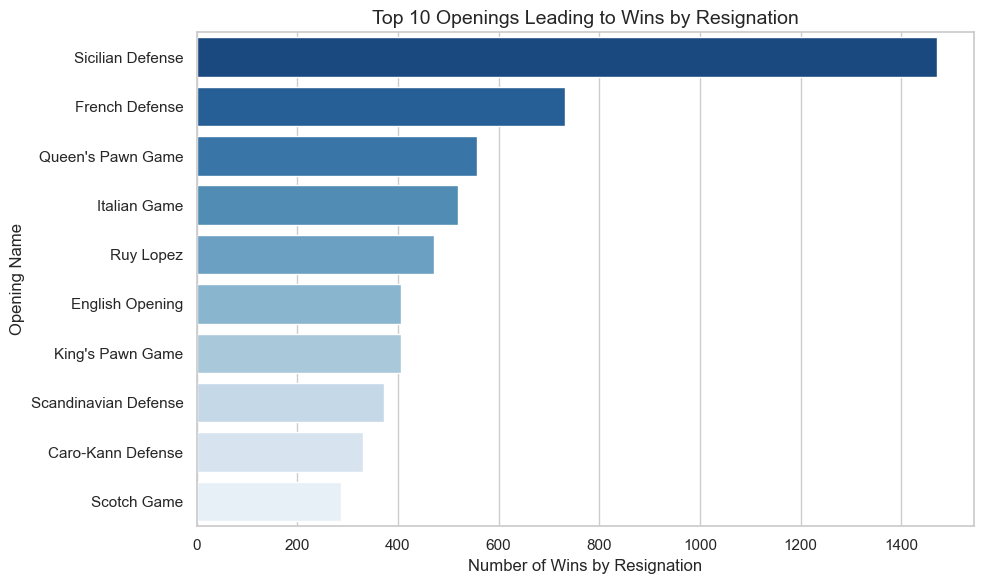

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_resign_openings,
    x='Resign Wins',
    y='opening_name',
    palette='Blues_r'
)

plt.title("Top 10 Openings Leading to Wins by Resignation", fontsize=14)
plt.xlabel("Number of Wins by Resignation", fontsize=12)
plt.ylabel("Opening Name", fontsize=12)

plt.tight_layout()
plt.show()

### **Hiệu quả của Sicilian Defense:**
- Đây là khai cuộc có tính chất tấn công cao và cho phép người chơi kiểm soát trung tâm ngay từ đầu, tạo áp lực lớn lên đối thủ.
- Số lượng thắng vượt trội cho thấy Sicilian Defense thường được người chơi mạnh sử dụng để tận dụng ưu thế kỹ thuật và buộc đối thủ sai lầm.

### **Tính phổ biến và chiến thuật:**
- Những khai cuộc như *French Defense* và *Queen’s Pawn Game* thể hiện sự cân bằng giữa phòng thủ và tấn công, giúp người chơi có nhiều lựa chọn chiến lược.
- Các khai cuộc ít phổ biến hơn như *Caro-Kann Defense* hoặc *Scandinavian Defense* vẫn đạt hiệu quả, nhưng thường được chọn bởi người chơi am hiểu sâu.

### **Kết luận:**
- *Sicilian Defense* là khai cuộc hiệu quả nhất, dẫn đến nhiều chiến thắng do đối thủ từ bỏ.
- Các khai cuộc phòng thủ như *French Defense* và *Caro-Kann Defense* cũng rất hiệu quả, mang lại lợi thế cho người chơi có khả năng chuyển đổi linh hoạt giữa phòng thủ và tấn công.
- Biểu đồ này cho thấy mối quan hệ giữa khai cuộc, chiến lược dài hạn và quyết định từ bỏ trận đấu của đối thủ.

## Question 6: Which first moves provide an advantage for each player?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>

- Nhóm dữ liệu theo mã khai cuộc (opening_eco) và kết quả trận đấu (winner), tính số lượng trận đấu cho mỗi kết hợp.

- Tính tổng số trận đấu cho mỗi khai cuộc và lưu vào cột total_games.

- Lọc lấy Top 20 khai cuộc phổ biến nhất dựa trên tổng số trận đấu.

- Tính tỷ lệ phần trăm số trận thắng cho mỗi bên (Trắng hoặc Đen) trong các khai cuộc phổ biến.

- Dữ liệu được pivot lại để có dạng bảng với opening_eco là chỉ mục và các kết quả (winner) là các cột, chứa tỷ lệ phần trăm thắng.


In [15]:
chess_summary = (
    clean_df.groupby(['opening_eco', 'winner'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

chess_summary['total_games'] = chess_summary.groupby('opening_eco')['count'].transform('sum')

top_10_openings = chess_summary.groupby('opening_eco')['total_games'].max().nlargest(20).index
filtered_chess_summary = chess_summary[chess_summary['opening_eco'].isin(top_10_openings)]

filtered_chess_summary['percent'] = filtered_chess_summary.groupby('opening_eco')['count'].transform(lambda x: x / x.sum())

pivot_data = filtered_chess_summary.pivot(index='opening_eco', columns='winner', values='percent').fillna(0)

C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\615184035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_chess_summary['percent'] = filtered_chess_summary.groupby('opening_eco')['count'].transform(lambda x: x / x.sum())


#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>


- Vẽ biểu đồ Stacked Bar Chart thể hiện tỷ lệ phần trăm chiến thắng của Trắng và Đen cho các khai cuộc phổ biến.
- Mỗi thanh biểu đồ thể hiện tỷ lệ phần trăm thắng cho Trắng và Đen trong một khai cuộc.
- Vẽ đường kẻ dọc để phân chia tỷ lệ thắng của Trắng và Đen.

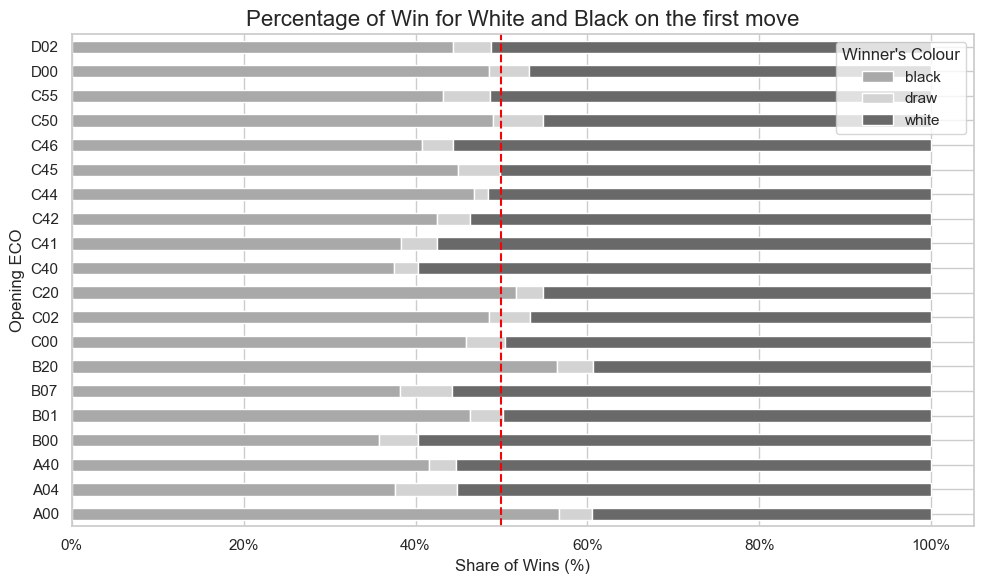

In [16]:
pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['#a9a9a9', '#d3d3d3', '#696969']  
)
plt.axvline(0.5, color='red', linestyle='dashed', linewidth=1.5)
plt.title("Percentage of Win for White and Black on the first move", fontsize=16)
plt.xlabel("Share of Wins (%)", fontsize=12)
plt.ylabel("Opening ECO", fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  
plt.legend(title="Winner's Colour")
plt.tight_layout()
plt.show()

### **Đối với White:**
- Những nước đi đầu tiên như *D02* và *C55* mang lại lợi thế rõ ràng, giúp White tận dụng lợi thế đi trước để kiểm soát trận đấu.
- Người chơi White nên tập trung vào các khai cuộc kiểm soát trung tâm như *Queen's Pawn Game* hoặc *Italian Game*.

### **Đối với Black:**
- Các khai cuộc phản công như *Scandinavian Defense* và *Alekhine Defense* có thể làm giảm áp lực của White, buộc họ phải đối mặt với thế trận phức tạp hơn.

### **Tính cân bằng của khai cuộc:**
- Một số khai cuộc, đặc biệt là các khai cuộc phổ biến như *C42* (*Petrov Defense*), cho thấy sự cân bằng tốt giữa hai bên.
- Điều này phù hợp cho các trận đấu mà cả hai người chơi đều có kỹ thuật cao.

---

### Kết luận
- **White** có lợi thế rõ ràng ở hầu hết các khai cuộc, đặc biệt là những khai cuộc kiểm soát trung tâm.
- **Black** có thể tạo bất ngờ và đảo ngược lợi thế bằng các khai cuộc phản công hoặc phòng thủ chắc chắn.

## Question 7:  How does the rating difference affect the outcome of a game?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>

- Sử dụng các khoảng giá trị của Rating_Diff để chia thành các nhóm rating (ví dụ: 0-50, 51-100, ...). Tạo cột Rating_Group để lưu nhóm rating cho mỗi trận đấu.

- Nhóm dữ liệu theo Rating_Group và winner condition, sau đó tính số lượng trận đấu cho mỗi nhóm.

- Tính tổng số trận đấu trong mỗi nhóm rating để chuẩn hóa tỷ lệ phần trăm.

- Tính tỷ lệ phần trăm số trận thắng cho mỗi nhóm rating và kết quả (Trắng, Đen, Hòa).

- Chuyển dữ liệu thành dạng bảng (pivot table) để có Rating_Group là chỉ mục và các kết quả (winner condition) là các cột, chứa tỷ lệ phần trăm chiến thắng.

In [17]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]  
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 
          '251-300', '301-350', '351-400', '401-450', '>450']
clean_df['Rating_Group'] = pd.cut(clean_df['Rating_Diff'], bins=bins, labels=labels, right=False)

rating_summary = (
    clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')

rating_summary['percent'] = rating_summary['count'] / rating_summary['total_games']

pivot_data = rating_summary.pivot(index='Rating_Group', columns='winner condition', values='percent').fillna(0)

C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\3721445698.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\3721445698.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')


#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>

- Vẽ biểu đồ Stacked Bar Chart thể hiện tỷ lệ phần trăm chiến thắng (trắng, đen, hòa) cho mỗi nhóm rating.

- Thêm các yếu tố như tiêu đề, nhãn trục, định dạng phần trăm cho trục Y, và thiết lập vị trí của legend để biểu đồ dễ hiểu hơn.

C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\472834292.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
C:\Users\ACER\AppData\Local\Temp\ipykernel_22372\472834292.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')


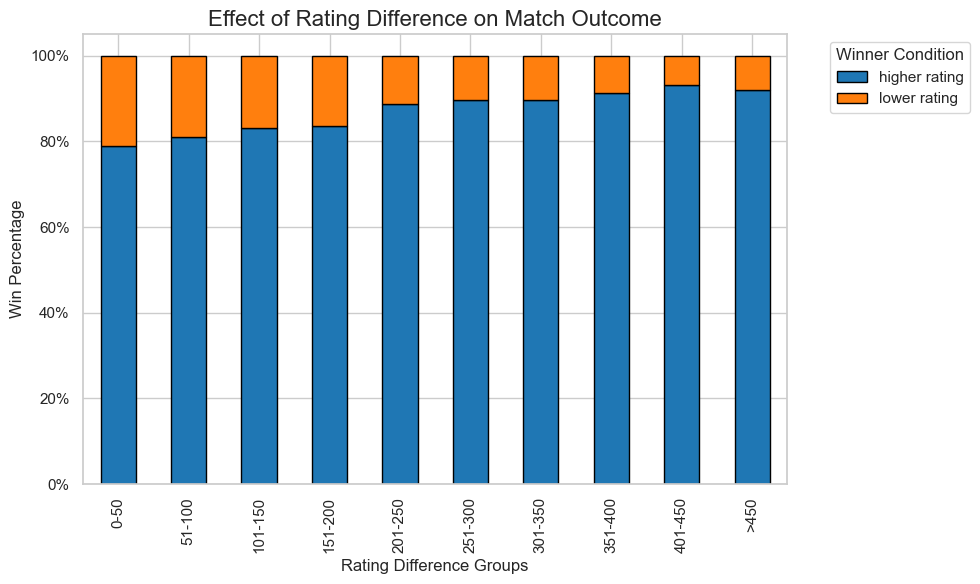

In [18]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]  
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 
          '251-300', '301-350', '351-400', '401-450', '>450']
clean_df['Rating_Group'] = pd.cut(clean_df['Rating_Diff'], bins=bins, labels=labels, right=False)

rating_summary = (
    clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')

rating_summary['percent'] = rating_summary['count'] / rating_summary['total_games']

pivot_data = rating_summary.pivot(index='Rating_Group', columns='winner condition', values='percent').fillna(0)

ax = pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
    edgecolor="black"
)

plt.title("Effect of Rating Difference on Match Outcome", fontsize=16)
plt.xlabel("Rating Difference Groups", fontsize=12)
plt.ylabel("Win Percentage", fontsize=12)
plt.legend(title="Winner Condition", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))  
plt.tight_layout()

plt.show()

### **Tác động của khoảng cách rating:**
- Sự chênh lệch rating là yếu tố quyết định quan trọng đến kết quả trận đấu. Rating cao hơn phản ánh kỹ năng vượt trội, khả năng ra quyết định tốt hơn, và ít mắc sai lầm.
- Khi khoảng cách rating nhỏ, trận đấu phụ thuộc nhiều hơn vào yếu tố tâm lý và phong cách chơi. Nhưng khi khoảng cách lớn, kết quả trở nên dự đoán dễ dàng hơn.

### **Khả năng bất ngờ:**
- Người chơi rating thấp hơn chỉ có cơ hội tạo bất ngờ trong các nhóm chênh lệch nhỏ (đặc biệt là nhóm 0–50). 
- Điều này có thể do tâm lý thoải mái hơn và ít áp lực hơn khi đối đầu với đối thủ mạnh.

### **Tâm lý người chơi:**
- Người chơi rating cao hơn thường có tâm lý vững vàng hơn khi đối mặt với đối thủ yếu hơn, điều này càng làm tăng lợi thế của họ.
- Người chơi rating thấp hơn dễ rơi vào áp lực, đặc biệt khi chênh lệch rating quá lớn.

---

### Kết luận
- **Khoảng cách rating lớn hơn** dẫn đến ưu thế rõ ràng cho người chơi có rating cao hơn, đặc biệt ở các nhóm >150.
- **Người chơi rating thấp hơn** chỉ có khả năng thắng đáng kể khi chênh lệch rating rất nhỏ (0–50).
- Biểu đồ cho thấy sự quan trọng của rating trong việc dự đoán kết quả, nhưng cũng nhấn mạnh rằng bất ngờ vẫn có thể xảy ra khi chênh lệch không lớn.

## Question 8: How does the base time affect the result of the game (win/loss/draw)?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>

- Chọn các trận đấu có base_time nhỏ hơn 31 phút.

- Nhóm dữ liệu theo thời gian cơ bản (base_time) và kết quả trận đấu (winner), sau đó tính số lượng trận đấu cho mỗi nhóm.

- Tính tổng số trận đấu cho từng giá trị base_time và chuẩn hóa tỷ lệ phần trăm số trận thắng của mỗi kết quả (Trắng, Đen, Hòa).

- Pivot dữ liệu để có dạng bảng với base_time là chỉ mục và các kết quả (winner) là các cột, chứa tỷ lệ phần trăm chiến thắng.

In [19]:
filtered_df = clean_df[clean_df['base_time'] < 31]


base_time_summary = (
    filtered_df.groupby(['base_time', 'winner'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

base_time_summary['total_games'] = base_time_summary.groupby('base_time')['count'].transform('sum')
base_time_summary['percent'] = base_time_summary['count'] / base_time_summary['total_games']

pivot_data = base_time_summary.pivot(index='base_time', columns='winner', values='percent').fillna(0)

#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>

- Vẽ biểu đồ Stacked Bar Chart ngang thể hiện tỷ lệ phần trăm chiến thắng của mỗi kết quả (Trắng, Đen, Hòa) theo thời gian cơ bản (base_time).

- Thêm các yếu tố như tiêu đề, nhãn trục, định dạng phần trăm cho trục X, và kẻ đường dọc tại 50% để làm rõ sự phân chia giữa các kết quả.

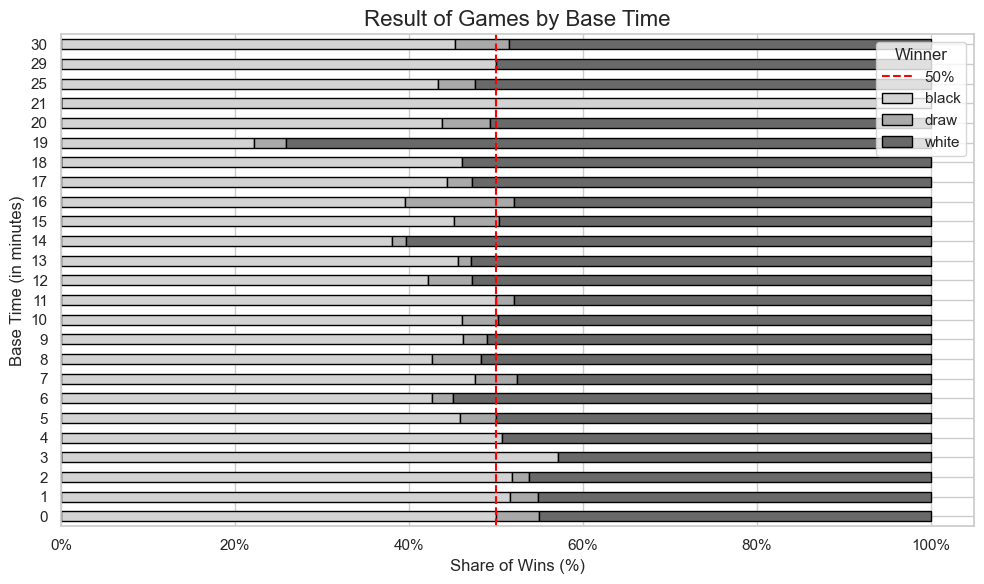

In [20]:
ax = pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['#d3d3d3', '#a9a9a9', '#696969'],  
    edgecolor="black"
)

plt.axvline(0.5, color='red', linestyle='dashed', linewidth=1.5, label='50%')

plt.title("Result of Games by Base Time", fontsize=16)
plt.xlabel("Share of Wins (%)", fontsize=12)
plt.ylabel("Base Time (in minutes)", fontsize=12)
plt.legend(title="Winner")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  
plt.tight_layout()

plt.show()

### **Thời gian và chất lượng trận đấu:**
- Thời gian dài hơn dẫn đến các trận đấu có chất lượng cao hơn, với tỷ lệ hòa cao hơn và kết quả cân bằng giữa hai bên.
- Thời gian ngắn hơn làm giảm chất lượng nước đi và tăng khả năng mắc sai lầm, đặc biệt là từ Black.

### **Lợi thế của White:**
- White có lợi thế rõ ràng trong các trận đấu nhanh (*blitz* hoặc *bullet*), do khả năng tận dụng thời gian để tạo áp lực ngay từ đầu.
- Lợi thế này giảm dần khi thời gian cơ bản tăng lên, cho phép Black có cơ hội chống trả hiệu quả hơn.

### **Tâm lý người chơi:**
- Áp lực thời gian trong các trận đấu nhanh làm tăng tần suất sai lầm, đặc biệt đối với Black, dẫn đến tỷ lệ thắng thấp hơn.
- Trong các trận đấu dài, cả hai bên có xu hướng chơi chắc chắn hơn, dẫn đến kết quả hòa nhiều hơn.

---

### Kết luận
- **Thời gian dài hơn** (>=15 phút) dẫn đến các trận đấu cân bằng hơn giữa White và Black, với tỷ lệ hòa cao hơn.
- **Thời gian ngắn hơn** (<=5 phút) mang lại lợi thế lớn cho White, nhờ khả năng tận dụng thời gian và áp lực đi trước.
- Biểu đồ nhấn mạnh rằng thời gian cơ bản không chỉ ảnh hưởng đến kết quả mà còn phản ánh cách người chơi xử lý áp lực và chiến thuật trong các tình huống khác nhau.